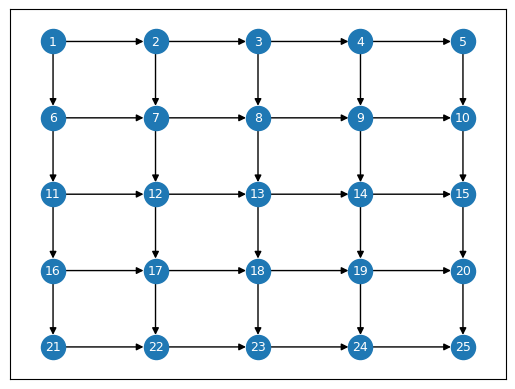

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

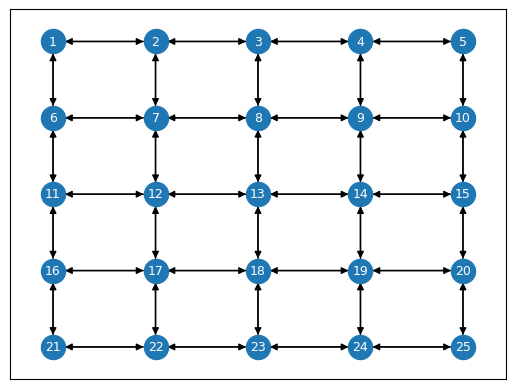

In [3]:
%run utils.py
link = 80
G,pos = generate_gridNet(5, 5, f"_temp_Network_25_{link}.tntp", draw=True, target_links=link)

In [2]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
for i in range(1):
    out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, f'stats_10000_{i+1}.pkl')

nb_entries :  0 . Number OD:  13
nb_entries :  1 . Number OD:  168
nb_entries :  2 . Number OD:  174
nb_entries :  3 . Number OD:  107
nb_entries :  4 . Number OD:  110
nb_entries :  5 . Number OD:  14
nb_entries :  6 . Number OD:  176
nb_entries :  7 . Number OD:  20
nb_entries :  8 . Number OD:  76
nb_entries :  9 . Number OD:  91
nb_entries :  10 . Number OD:  29
nb_entries :  11 . Number OD:  166
nb_entries :  12 . Number OD:  125
nb_entries :  13 . Number OD:  6
nb_entries :  14 . Number OD:  134
nb_entries :  15 . Number OD:  53
nb_entries :  16 . Number OD:  174
nb_entries :  17 . Number OD:  124
nb_entries :  18 . Number OD:  156
nb_entries :  19 . Number OD:  180
nb_entries :  20 . Number OD:  53
nb_entries :  21 . Number OD:  79
nb_entries :  22 . Number OD:  77
nb_entries :  23 . Number OD:  86
nb_entries :  24 . Number OD:  53
nb_entries :  25 . Number OD:  84
nb_entries :  26 . Number OD:  86
nb_entries :  27 . Number OD:  168
nb_entries :  28 . Number OD:  20
nb_entries :

## Fusion of files

In [2]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

185
10000
185
10000
185
10000
185
10000


In [3]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

185
40000


## Flow network : Solving

In [55]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print("Number of OD matrix, end of index: ", count2)

0
Number of OD matrix, end of index:  203
1
Number of OD matrix, end of index:  425
2
Number of OD matrix, end of index:  651
3
Number of OD matrix, end of index:  881
4
Number of OD matrix, end of index:  1093
5
Number of OD matrix, end of index:  1297
6
Number of OD matrix, end of index:  1525
7
Number of OD matrix, end of index:  1754
8
Number of OD matrix, end of index:  1967
9
Number of OD matrix, end of index:  2180
10
Number of OD matrix, end of index:  2379
11
Number of OD matrix, end of index:  2620
12
Number of OD matrix, end of index:  2860
13
Number of OD matrix, end of index:  3099
14
Number of OD matrix, end of index:  3314
15
Number of OD matrix, end of index:  3526
16
Number of OD matrix, end of index:  3728
17
Number of OD matrix, end of index:  3956
18
Number of OD matrix, end of index:  4163
19
Number of OD matrix, end of index:  4367
20
Number of OD matrix, end of index:  4585
21
Number of OD matrix, end of index:  4809
22
Number of OD matrix, end of index:  5039
23

In [14]:
import pickle
import random
%run utils.py

num_nodes = 24
min_demand = 50
max_demand = 500
num_pairs = int((num_nodes**2)*0.7)
num_matrix = 1
filename = f'../Generate_data/Random/od_demand_{num_matrix}.pkl'

# Create 1000 OD demand
od_demand_list = [generate_OD_demand(num_nodes, min_demand, max_demand, num_pairs) for i in range(num_matrix)]
with open(filename, 'wb') as f:
    pickle.dump(od_demand_list, f)

a_file = open(filename, "rb")
output = pickle.load(a_file)
a_file.close()

for i, od_demand in enumerate(output[:2]):
    print(len(od_demand))
    print(od_demand)

345
{(15, 21): 1311, (18, 17): 1575, (8, 9): 873, (19, 9): 1520, (8, 18): 731, (11, 23): 880, (4, 2): 924, (22, 10): 1776, (22, 19): 1636, (3, 15): 788, (18, 3): 1297, (18, 12): 1019, (7, 21): 1314, (18, 21): 1578, (19, 4): 1368, (10, 22): 516, (14, 19): 1853, (3, 19): 1933, (15, 2): 1823, (18, 7): 267, (21, 18): 354, (11, 4): 491, (2, 13): 967, (22, 9): 191, (3, 5): 1070, (14, 5): 1887, (3, 14): 1922, (3, 23): 146, (14, 23): 980, (15, 6): 1276, (18, 11): 447, (7, 11): 1194, (21, 13): 1692, (6, 24): 239, (10, 3): 510, (10, 12): 245, (10, 21): 1669, (2, 17): 929, (22, 13): 585, (17, 20): 781, (21, 8): 1921, (6, 19): 1281, (2, 3): 826, (10, 16): 1525, (2, 12): 890, (2, 21): 666, (22, 8): 714, (3, 4): 1914, (17, 6): 658, (17, 15): 1441, (5, 22): 1796, (17, 24): 1193, (6, 5): 539, (6, 14): 695, (21, 12): 1426, (6, 23): 1262, (10, 11): 1595, (2, 7): 1226, (24, 13): 177, (24, 22): 439, (13, 22): 616, (16, 18): 144, (17, 10): 1762, (9, 6): 832, (17, 19): 1414, (9, 15): 325, (6, 9): 258, (21, 

In [8]:
# from utils import *
from tqdm.notebook import tqdm
%run utils.py

a_file = open('../Generate_data/SiouxFalls/od_demand_list_4000.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('SiouxFalls/SiouxFalls_net_remove2.tntp')

time = 0

for OD_matrix in tqdm(stats[:1]) :
    if time < 10000:
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status ==2 :
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Solution/SiouxFalls/remove2_{}".format(time+1), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

  0%|          | 0/1 [00:00<?, ?it/s]

0
model solved in: 0.8082950115203857


# BRUE

In [1]:
%run utils.py

# Get full feasible path set for full network
demand_file = 'SiouxFalls/od_demand_list_4000.pkl'
net_file = 'SiouxFalls/SiouxFalls_net.tntp'
path_set_dict, pair_path = get_full_paths(demand_file, net_file, path_num=7)

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
%run utils.py

def solve_BRUE(net_file, demand_file, pair_path, output_file, to_solve):
    stat = read_file(demand_file)
    Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet(net_file)

    time = 0
    for OD_matrix in tqdm(stat[:to_solve]):
        print(time)
        paths = {k: (pair_path[k][:3] if len(pair_path[k]) >= 3 else pair_path[k]) for k in OD_matrix.keys()}
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix, paths)
        flows, linkss, path_cost, min_cost, link_cost, x4 = BRUE(data, n, OD, Q)
        dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : linkss, 'path_cost': path_cost, 'min_cost': min_cost, 'link_cost': link_cost, 'x4': x4}
        # flows, linkss = BRUE(data, n, OD, Q)
        # dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : linkss}
        file_data = open(output_file+str(time), "wb")
        pickle.dump(dataa , file_data)
        file_data.close()
        time +=1

output_file = '../Solution/SiouxFalls/BRUE/output'
solve_BRUE(net_file, demand_file, pair_path, output_file, to_solve=1)

  0%|          | 0/1 [00:00<?, ?it/s]

0
Set parameter LogFile to value "gurobi_log.txt"
Set parameter NumericFocus to value 3
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 161578 rows, 155830 columns and 783890 nonzeros
Model fingerprint: 0xab68d4b7
Coefficient statistics:
  Matrix range     [1e-10, 1e+20]
  Objective range  [1e+03, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+03]
Presolve removed 159790 rows and 78800 columns
Presolve time: 0.49s
Presolved: 1788 rows, 77030 columns, 241205 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.03s

Barrier statistics:
 Dense cols : 72
 AA' NZ     : 1.794e+04
 Factor NZ  : 4.294e+04 (roughly 30 MB of memory)
 Factor Ops : 1.848e+06 (less than 1 second per iteration)
 Threads    : 6

                  Objective                

### SOLVE UE FOR LINK REMOVED NETWORK

In [1]:
%run utils.py

# Get full feasible path set for full network
demand_file = 'SiouxFalls/od_demand_list_4000.pkl'
net_file = 'SiouxFalls/SiouxFalls_net.tntp'
path_set_dict, pair_path = get_full_paths(demand_file, net_file, path_num=3)

  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
%run utils.py

# Remove links from origin network
new_net_file = 'SiouxFalls/SiouxFalls_net_remove2.tntp'
remove_ids = [5, 20]
remove_links_from_tntp(net_file, new_net_file, remove_ids)
new_pair_path = remove_links_from_path(pair_path, remove_ids)

output_file = '../Solution/SiouxFalls/Remove2/SiouxFall_UE_'
solve_UE(new_net_file, demand_file, new_pair_path, output_file, to_solve=400)


  0%|          | 0/400 [00:00<?, ?it/s]

model solved in: 1.2197239398956299
Finish solving file  1
model solved in: 1.0642778873443604
Finish solving file  2
model solved in: 1.3703291416168213
Finish solving file  3
model solved in: 1.2543740272521973
Finish solving file  4
model solved in: 1.2483389377593994
Finish solving file  5
model solved in: 1.7124059200286865
Finish solving file  6
model solved in: 1.179673671722412
Finish solving file  7
model solved in: 1.1862890720367432
Finish solving file  8
model solved in: 1.0997717380523682
Finish solving file  9
model solved in: 1.0245490074157715
Finish solving file  10
model solved in: 0.8811361789703369
Finish solving file  11
model solved in: 0.8293969631195068
Finish solving file  12
model solved in: 0.811682939529419
Finish solving file  13
model solved in: 1.0440361499786377
Finish solving file  14
model solved in: 0.9164431095123291
Finish solving file  15
model solved in: 1.2894129753112793
Finish solving file  16
model solved in: 1.0790419578552246
Finish solving 

# Remove 3 links from origin network


In [ ]:
%run utils.py

new_net_file = 'SiouxFalls/SiouxFalls_net_remove3.tntp'
remove_ids = [5, 20, 40]
remove_links_from_tntp(net_file, new_net_file, remove_ids)
new_pair_path = remove_links_from_path(pair_path, remove_ids)

output_file = '../Solution/SiouxFalls/Remove3/SiouxFall_UE_'
solve_UE(new_net_file, demand_file, new_pair_path, output_file, to_solve=400)